![Alt text](https://miro.medium.com/v2/resize:fit:960/0*puClFxWSP4buuk08.gif "a title")

In [4]:
# packages
import pandas as pd # for data processing
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt

In [3]:
netflix_data = pd.read_csv("dataset/cleaned_netflix_data.csv")
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,TV Show,On the Verge,Unknown,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States","September 7, 2021",2021,TV-MA,1 Season,"TV Comedies, TV Dramas","Four women — a chef, a single mom, an heiress ..."
3,Movie,Stowaway,Joe Penna,"Anna Kendrick, Toni Collette, Daniel Dae Kim, ...","Germany, United States","April 22, 2021",2021,TV-MA,116 min,"Dramas, International Movies, Thrillers",A three-person crew on a mission to Mars faces...
4,Movie,Wild Dog,Ahishor Solomon,"Nagarjuna Akkineni, Dia Mirza, Saiyami Kher, A...",Unknown,"April 22, 2021",2020,TV-MA,126 min,"Action & Adventure, International Movies",A brash but brilliant Indian intelligence agen...


In [24]:
netflix_data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [25]:
netflix_data.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [26]:
# Shape of the dataset
netflix_data.shape

(8807, 11)

In [27]:
# check non unique values 
netflix_data.nunique()

type               2
title           8807
director        4529
cast            7693
country          749
date_added      1767
release_year      74
rating            14
duration         220
listed_in        514
description     8775
dtype: int64

In [28]:
# check for duplicate values
netflix_data.duplicated().sum()

0

In [29]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


Heat map to shop null values count

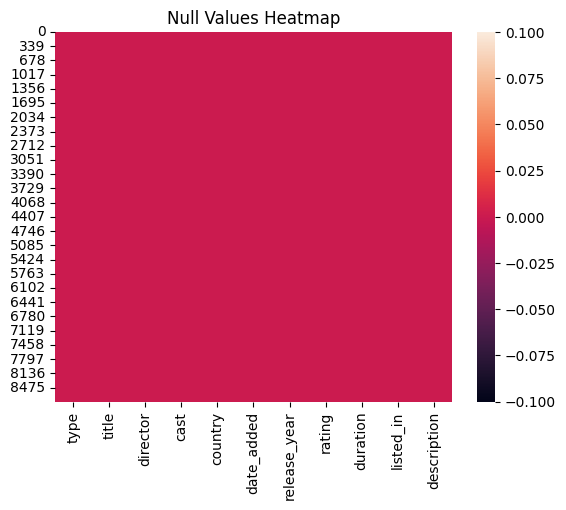

In [5]:
sns.heatmap(netflix_data.isnull())
plt.title('Null Values Heatmap')
plt.show()

In [30]:
# understanding variables
variables = pd.DataFrame(columns=['Variable','Num of unique values','values'])

for i,var in enumerate(netflix_data.columns):
    variables.loc[i] = [var,netflix_data[var].nunique(),netflix_data[var].unique().tolist()]

variables

,Variable,Num of unique values,values
0,type,2,"[Movie, TV Show]"
1,title,8807,"[Dick Johnson Is Dead, The Starling, On the Ve..."
2,director,4529,"[Kirsten Johnson, Theodore Melfi, Unknown, Joe..."
3,cast,7693,"[Unknown, Melissa McCarthy, Chris O'Dowd, Kevi..."
4,country,749,"[United States, France, United States, Germany..."
5,date_added,1767,"[September 25, 2021, September 24, 2021, Septe..."
6,release_year,74,"[2020, 2021, 2015, 2013, 2018, 2017, 2019, 201..."
7,rating,14,"[PG-13, TV-MA, TV-14, TV-Y, TV-Y7, R, PG, TV-P..."
8,duration,220,"[90 min, 104 min, 1 Season, 116 min, 126 min, ..."
9,listed_in,514,"[Documentaries, Comedies, Dramas, TV Comedies,..."


In [6]:
netflix_data['title'].unique()

array(['Dick Johnson Is Dead', 'The Starling', 'On the Verge', ...,
       'HOMUNCULUS', 'Life in Color with David Attenborough',
       'Searching For Sheela'], dtype=object)

FILTERING 
---
FILTERING BASED ON SPECIFIC CONDITIONS LIKE 'type' = Movie/TV Show AND 'country' , SHOW THE TITTLE OF THE TV SHOWS IN UK

In [23]:
# export data frame to show the number of shows released in @ country
country_data = netflix_data['country'].value_counts().reset_index()
country_data.columns = ['country', 'Count']
country_data.to_csv('country_data.csv', index=False)

In [24]:
# netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['country'].isin(['United Kingdom']))] 

# look into the records
# uk_data = netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['country'] == 'United States')] 
# Export the DataFrame to a CSV file
# uk_data.to_csv('us_data.csv', index=False)

netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['country'] == 'United Kingdom')] ['title']



142                          Murder Maps
147     Secrets of Great British Castles
187                       The Irregulars
205          Formula 1: Drive to Survive
232                           Zero Chill
                      ...               
8603                         Wild Arabia
8611                  Booba: Food Puzzle
8621              World's Busiest Cities
8696       The Great British Baking Show
8796           Octonauts: Above & Beyond
Name: title, Length: 213, dtype: object

SHOW THE TITTLE OF THE MOVIE IN UK

In [26]:
netflix_data[(netflix_data['type'] == 'Movie') & (netflix_data['country'] == 'United Kingdom')] ['title']

166                                   Not a Game
182     Elizabeth and Margaret: Love and Loyalty
314                                         Pelé
321         Fate: The Winx Saga - The Afterparty
350                                      Monsoon
                          ...                   
8598                  Why Are We Getting So Fat?
8606                                    Williams
8652                                You Can Tutu
8688                                  Layer Cake
8748                            Sitting in Limbo
Name: title, Length: 206, dtype: object

SHOW ALL THE MOVIES UNDER THE CATEGORY MOVIE THAT ARE COMEDIE AND RELEASED IN UK

In [43]:
netflix_data[(netflix_data['listed_in'].str.contains('Comedies', case=False))  & (netflix_data['type'] == 'Movie') & (netflix_data['country'] == 'United Kingdom') ]

# Filtering the string Comedies in the column 'listed_in'
# netflix_data[ (netflix_data['listed_in'].str.contains('Comedies', case=False)) ] #2255 rows

# Filtering the string Comedies in the column 'listed_in' and is a  Movie 
# netflix_data[ (netflix_data['listed_in'].str.contains('Comedies', case=False)) & (netflix_data['type'] == 'Movie')] #1674 rows

# Filtering the string Comedies in the column 'listed_in' and is a  Movie  or coutry is UK
# The first conditions before or will be checked if its TRUE in not the OR condition will run
# netflix_data[ (netflix_data['listed_in'].str.contains('Comedies', case=False)) & (netflix_data['type'] == 'Movie')| (netflix_data['country'] == 'United Kingdom')] #2061 rows

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
321,Movie,Fate: The Winx Saga - The Afterparty,Unknown,"David Spade, London Hughes, Fortune Feimster, ...",United Kingdom,"February 20, 2021",2021,TV-14,36 min,"Comedies, Dramas",Stars of the fiery hit discuss the show's magi...
566,Movie,Shaun the Sheep: The Farmer’s Llamas,Jay Grace,"Justin Fletcher, John Sparkes, Sean Connolly, ...",United Kingdom,"December 22, 2020",2020,TV-Y,28 min,"Children & Family Movies, Comedies",A trio of mischievous llamas from the county f...
900,Movie,Fisherman's Friends,Chris Foggin,"Daniel Mays, James Purefoy, David Hayman, Dave...",United Kingdom,"October 22, 2020",2019,PG-13,112 min,"Comedies, Dramas, Music & Musicals",Sea shanties have long united 10 Cornish fishe...
1096,Movie,Horrid Henry's Gross Day Out,Gary Andrews,"Lizzie Waterworth-Santo, Emma Tate, Sue Elliot...",United Kingdom,"September 17, 2020",2020,TV-Y,61 min,"Children & Family Movies, Comedies",Worlds collide when Henry makes plans to spend...
2145,Movie,Quartet,Dustin Hoffman,"Maggie Smith, Tom Courtenay, Billy Connolly, P...",United Kingdom,"August 8, 2021",2012,PG-13,98 min,"Comedies, Dramas, Independent Movies","To save their posh retirement home, former ope..."
2285,Movie,Breaking the Bank,Vadim Jean,"Kelsey Grammer, Tamsin Greig, John Michael Hig...",United Kingdom,"January 1, 2020",2014,TV-PG,105 min,"Comedies, International Movies",Bank chairman Charles Bunbury – who knows next...
2443,Movie,Mahi NRI,Gaurav Bavdankar,"Harrdy Sandhu, Poppy Jabbal, Rameet Kaur, B.N....",United Kingdom,"December 1, 2019",2017,TV-14,134 min,"Comedies, Dramas, International Movies",A Punjabi man attempts to build a life in Lond...
2594,Movie,Christmas Survival,James Dearden,"Julian Ovenden, Gemma Whelan, Joely Richardson...",United Kingdom,"November 1, 2019",2018,TV-MA,101 min,Comedies,"With Christmas just around the corner, sisters..."
2657,Movie,Free Fire,Ben Wheatley,"Sharlto Copley, Armie Hammer, Brie Larson, Cil...",United Kingdom,"October 21, 2019",2016,R,91 min,"Action & Adventure, Comedies, Independent Movies",A sketchy arms transaction in a deserted wareh...
3136,Movie,PATRICK (2019),Mandie Fletcher,"Beattie Edmondson, Ed Skrein, Tom Bennett, Jen...",United Kingdom,"May 16, 2019",2019,TV-PG,94 min,"Children & Family Movies, Comedies","When a schoolteacher inherits an adorable pug,..."


FIND THE NUMBER OF TV SHOWS AND MOVIES TOW CRUISE WAS CASTED IN

In [42]:
netflix_data[netflix_data['cast'].str.contains('Tom Cruise')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
285,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki..."
2690,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio..."


WHAT ARE THE DIFFERENT RATING DEFINED BY NETFLIX

In [44]:
# Movies in Canada with TV-14 rating
netflix_data[(netflix_data['country'].str.contains('Canada', case=False))  & (netflix_data['type'] == 'Movie') & (netflix_data['rating'] == 'TV-14') ]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5,Movie,Oloibiri,Curtis Graham,"Olu Jacobs, Richard Mofe-Damijo, William R. Mo...","Canada, Nigeria, United States","April 21, 2021",2015,TV-14,86 min,"Dramas, International Movies, Thrillers","After drilling depletes a small village, a cor..."
313,Movie,Made You Look: A True Story About Fake Art,Barry Avrich,Unknown,Canada,"February 23, 2021",2020,TV-14,90 min,"Documentaries, International Movies",A woman walks into a New York gallery with a c...
645,Movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,"September 1, 2021",2018,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...
802,Movie,We Are All For The Fatherland,Unknown,Unknown,"Lebanon, Canada, France","November 11, 2020",1979,TV-14,74 min,"Documentaries, International Movies","After the 1978 Israeli invasion of Lebanon, ch..."
926,Movie,Whispers,Maroun Baghdadi,"Nadia Tueni, Ziad Rahbani","Lebanon, Canada, France","October 19, 2020",1980,TV-14,93 min,"Documentaries, International Movies","With her home devastated by war, a Lebanese po..."
1465,Movie,The Silence of Others,"Almudena Carracedo, Robert Bahar",Unknown,"Spain, France, Canada, United States","July 1, 2020",2019,TV-14,96 min,"Documentaries, International Movies","Filmed over six years, this documentary captur..."
1968,Movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,"March 27, 2020",2019,TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...
2696,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",2019,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...
5216,Movie,For the Love of Spock,Adam Nimoy,"Leonard Nimoy, William Shatner, George Takei, ...","Canada, United States","December 2, 2016",2016,TV-14,112 min,Documentaries,The son of actor Leonard Nimoy directs this mo...
5265,Movie,I Am the Pretty Thing That Lives in the House,Osgood Perkins,"Ruth Wilson, Bob Balaban, Lucy Boynton, Paula ...","Canada, United States","October 28, 2016",2016,TV-14,89 min,"Horror Movies, International Movies, Thrillers",A nervous nurse who scares easily finds hersel...


HOW MANY TV SHOW GOT THE 'R' RATING AFTER 2018  OR HOW MANY MOVIES GOT THE 'R' RATING AFTER 2018

In [46]:
netflix_data[(netflix_data['rating']== 'R') & (netflix_data['type']=='TV Show')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3216,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",Unknown,"April 25, 2019",2015,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...
7327,TV Show,Nobel,Unknown,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,"December 10, 2016",2016,R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...


In [49]:
netflix_data[(netflix_data['rating'] == 'R') & (netflix_data['type'] =='Movie') & (netflix_data['release_year'] > 2018) ]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
41,Movie,Synchronic,"Justin Benson, Aaron Moorhead","Anthony Mackie, Jamie Dornan, Katie Aselton, A...",United States,"April 16, 2021",2020,R,102 min,Thrillers,Two paramedics begin to question their realiti...
95,Movie,The Stand-In,Jamie Babbit,"Drew Barrymore, Michael Zegen, T.J. Miller, Ho...",United States,"April 10, 2021",2020,R,102 min,Comedies,"Her career in shambles, a reclusive movie star..."
120,Movie,Concrete Cowboy,Ricky Staub,"Idris Elba, Caleb McLaughlin, Jharrel Jerome, ...","United Kingdom, United States","April 2, 2021",2021,R,112 min,"Dramas, Independent Movies",Sent to live with his estranged father for the...
121,Movie,Cross: Rise of the Villains,"Patrick Durham, Paul G. Volk","Brian Austin Green, Vinnie Jones, Lori Heuring...",United States,"April 2, 2021",2019,R,100 min,Action & Adventure,"Armed with a mighty ancient amulet, a team of ..."
200,Movie,Jiu Jitsu,Dimitri Logothetis,"Alain Moussi, Nicolas Cage, Tony Jaa, Rick Yun...",United States,"March 20, 2021",2020,R,102 min,Action & Adventure,"After the defeat of a celebrated war hero, an ..."
...,...,...,...,...,...,...,...,...,...,...,...
7724,Movie,Saving Zoë,Jeffrey G. Hunt,"Laura Marano, Vanessa Marano, Christopher Tava...",United States,"January 15, 2020",2019,R,95 min,Dramas,A reserved high school freshman acts out when ...
8000,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
8034,Movie,The Wind,Emma Tammi,"Caitlin Gerard, Julia Goldani Telles, Ashley Z...",United States,"June 2, 2021",2019,R,88 min,Horror Movies,Isolated on a wind-ravaged 19th-century homest...
8378,Movie,Army of the Dead,Zack Snyder,"Dave Bautista, Ella Purnell, Omari Hardwick, G...",United States,"May 21, 2021",2021,R,148 min,"Action & Adventure, Horror Movies","After a zombie outbreak in Las Vegas, a group ..."


WHAT IS THE MAXIMUM DURATION OF MOVIE AND TV SHOWS IN NETFLIX